INFO: This notebook was used for augmenting the dataset containing images of puzzle pieces. It is created to be used in Google Colab. 

### INSTALL&IMPORT

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow 

### EXAMPLE

In [ ]:
img = cv2.imread('/content/cinderella_51.png')
background = cv2.imread('/content/wood.jpg')
background = cv2.resize(background, (256, 256))
foreground = cv2.imread('/content/flowers.jpg')
foreground = cv2.resize(foreground, (256, 256))

print(img.shape)
print(foreground.shape)
print(foreground.shape)

In [ ]:
new_img1 = cv2.bitwise_not(img)
new_img1 = cv2.bitwise_and(new_img1, background)
new_img2 = cv2.bitwise_and(img, foreground)

In [ ]:
new_img = cv2.bitwise_xor(new_img1, new_img2)

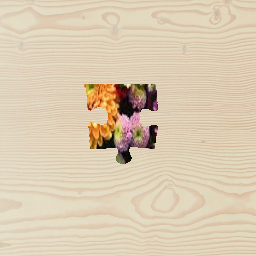

In [ ]:
cv2_imshow(new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### AUGMENT DATA

In [ ]:
path_images = '/content/gdrive/MyDrive/puzzle_pieces/masks_256'
path_background_light = '/content/gdrive/MyDrive/puzzle_pieces/background/light'
path_background_dark = '/content/gdrive/MyDrive/puzzle_pieces/background/dark'
path_foreground_light = '/content/gdrive/MyDrive/puzzle_pieces/foreground/light'
path_foreground_dark = '/content/gdrive/MyDrive/puzzle_pieces/foreground/dark'
list_of_images = os.listdir(path_images)
list_background_light = os.listdir(path_background_light)
list_background_dark = os.listdir(path_background_dark)
list_foreground_light = os.listdir(path_foreground_light)
list_foreground_dark = os.listdir(path_foreground_dark)
data = {'img':[], 'mask':[]}

In [ ]:
def generate_new_img(img, img_name, new_img_name, background_dir, foreground_dir, back_path, fore_path):
  random_bg = random.randint(0,len(background_dir)-1)
  random_fg = random.randint(0,len(foreground_dir)-1)

  # select a random background and a random foreground
  background = cv2.imread(back_path+'/'+background_dir[random_bg])
  background = cv2.resize(background, (256, 256))
  foreground = cv2.imread(fore_path+'/'+foreground_dir[random_fg])
  foreground = cv2.resize(foreground, (256, 256))

  # create a new image
  new_img1 = cv2.bitwise_not(img)
  new_img1 = cv2.bitwise_and(new_img1, background)
  new_img2 = cv2.bitwise_and(img, foreground)
  new_img = cv2.bitwise_xor(new_img1, new_img2)

  data['img'].append(new_img_name)
  data['mask'].append(img_name)
  cv2.imwrite('/content/gdrive/MyDrive/puzzle_pieces/augmented_data_256/' + new_img_name ,new_img)

In [ ]:
for img_name in list_of_images:
  img = cv2.imread(path_images+'/'+img_name)
  data['img'].append(img_name)
  data['mask'].append(img_name)

  new_img_name = img_name[:-4]
  generate_new_img(img, img_name, new_img_name+'_1.png', list_background_dark, list_foreground_light, path_background_dark, path_foreground_light)
  generate_new_img(img, img_name, new_img_name+'_2.png', list_background_dark, list_foreground_light, path_background_dark, path_foreground_light)
  generate_new_img(img, img_name, new_img_name+'_3.png', list_background_light, list_foreground_dark, path_background_light, path_foreground_dark)
  generate_new_img(img, img_name, new_img_name+'_4.png', list_background_light, list_foreground_dark, path_background_light, path_foreground_dark)
  generate_new_img(img, img_name, new_img_name+'_5.png', list_background_light, list_foreground_dark, path_background_light, path_foreground_dark)

In [ ]:
field_names = ['img','mask']
data = pd.DataFrame(data, columns=field_names)
data.to_csv('./mask_pairs.csv', index=False)